# Week 14
# Time Series Data

Time series data is a data set where instances are indexed by time. It is an important form of structured data in many fields such as finance, economics, ecology, neuroscience, and physics. 

Reading:
- Textbook, Chapter 11

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Date and Time Data Types and Tools

In Python, the `datetime.datetime` class is widely used to represent date and time data.

In [2]:
from datetime import datetime

datetime.now()

datetime.datetime(2023, 5, 8, 11, 30, 46, 435917)

In [3]:
datetime.now().year

2023

In [4]:
datetime.now().day

8

In [5]:
datetime.now().month

5

We can use `datetime.timedelta` to represent the temporal difference between two `datetime` objects.

In [6]:
from datetime import timedelta

delta = timedelta(10)

datetime.now() + delta

datetime.datetime(2023, 5, 18, 11, 31, 6, 521029)

In [7]:
date1 = datetime(2022, 12, 12)
date2 = datetime.now()
date2 - date1

datetime.timedelta(days=147, seconds=41466, microseconds=967676)

In [8]:
# Define a timedelta of 10 seconds
ten_seconds = timedelta(seconds=10)
print(ten_seconds)

0:00:10


In [9]:
# Define a time delta of 10 months
ten_months = timedelta(days=10*30)
print(ten_months)

300 days, 0:00:00


**Convert between string and datetime**

In [10]:
# datetime to string
date = datetime(2011, 1, 3, 23, 30, 45)
str(date)

'2011-01-03 23:30:45'

In [11]:
# Convert to format "YYYY-MM-DD"
date.strftime("%Y-%m-%d")

'2011-01-03'

Datetime formats:
- %Y: Four-digit year
- %y: Two-digit year
- %m: Two-digit month
- %d: Two-digit day
- %H: Hour 0 - 23
- %I: Hour 1 - 12
- %M: Two-digit minute
- %S: Second
- %A: Weekday

[More on this](https://docs.python.org/2/library/datetime.html)

In [12]:
# Exercise: convert date to "01/03/2011"

date.strftime("%m/%d/%Y")

'01/03/2011'

In [13]:
# Exercise: convert date to "01-03-2011 23:30"

date.strftime("%m-%d-%Y %H:%M")

'01-03-2011 23:30'

**Parse a datetime string**

Besides `pd.to_datetime()`, we can use `dateutil` to parse a string representing date and time.

In [14]:
# String to datetime
from dateutil.parser import parse
parse("2011-01-03")

datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
parse("Jan 31, 1997 10:45 PM")

datetime.datetime(1997, 1, 31, 22, 45)

In [16]:
# Many countries use format "DD/MM/YYYY". We need to set dayfirst=True
# so that the date is correctly recognized.
parse("06/12/2011", dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [17]:
parse("06/12/2011")

datetime.datetime(2011, 6, 12, 0, 0)

## 2. Time Series Basics

In [18]:
# Create a list of datetime objects
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 2, 7), datetime(2011, 2, 8),
         datetime(2011, 3, 10), datetime(2011, 3, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.359367
2011-01-05    0.609854
2011-02-07    1.171288
2011-02-08   -1.569146
2011-03-10   -0.702153
2011-03-12    0.140341
dtype: float64

In [19]:
# Select 01/05
ts['2011-01-05']

0.6098536358735128

In [20]:
ts[1]

0.6098536358735128

In [21]:
ts['01/05/2011']

0.6098536358735128

In [22]:
ts['20110105']

0.6098536358735128

In [23]:
# Select a range of dates
ts['2011-02']

2011-02-07    1.171288
2011-02-08   -1.569146
dtype: float64

In [24]:
ts['2011-02-01':'2011-02-8'] # the end datetime is also included

2011-02-07    1.171288
2011-02-08   -1.569146
dtype: float64

In [25]:
ts['2011-02-01':]

2011-02-07    1.171288
2011-02-08   -1.569146
2011-03-10   -0.702153
2011-03-12    0.140341
dtype: float64

In [26]:
ts[:"2011-03-10"]

2011-01-02    0.359367
2011-01-05    0.609854
2011-02-07    1.171288
2011-02-08   -1.569146
2011-03-10   -0.702153
dtype: float64

As a real-world example, let's retrieve Tesla's stock price from Yahoo Finance.

In [27]:
# if you haven't installed yahoo finance library, execute the command below:
# Install yahoo finance library
!pip install yfinance

In [28]:
import yfinance as yf

In [29]:
# Download the daily prices of Tesla ("TSLA") from 2020-01-01 to 2020-11-30
tsla = yf.download('TSLA', start="2023-01-01", end="2023-04-30")

tsla.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000


In [30]:
# Extract the stock price on a particular day.
tsla.loc[:"2023-01-07"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100


Text(0.5, 1.0, 'Tesla Stock Performance')

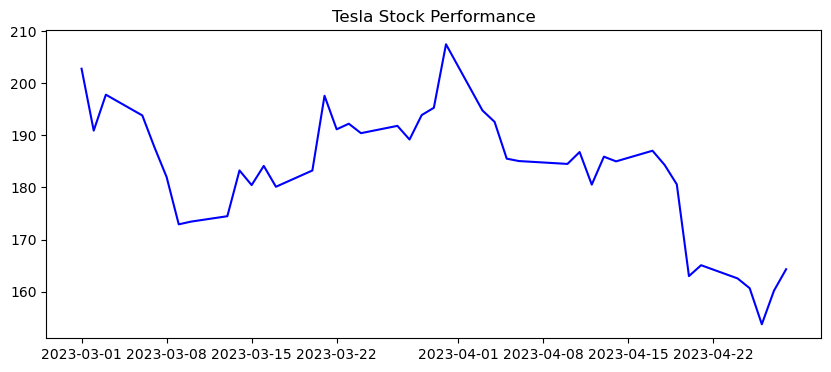

In [31]:
# Exercise: Draw a line chart of close prices 
# How about showing the prices bewteen a start date and an end date?
startdate = "2023-03-01"
enddate = "2023-04-30"
plt.figure(figsize=(10, 4))
plt.plot(tsla[startdate:enddate].index, 
         tsla.loc[startdate:enddate, 'Close'], 'b-')
plt.title("Tesla Stock Performance")

## 3. Date Ranges

In [32]:
# manually populate a list of dates
dates = [datetime(2011, 1, 2), datetime(2011, 3, 10), datetime(2011, 4, 1)]
# ts[dates] # Pandas no longer supports missing indices
ts[ts.index.isin(dates)]

2011-01-02    0.359367
2011-03-10   -0.702153
dtype: float64

In [33]:
# Create a range of dates
daterange = pd.date_range('2011-01-01', periods=8)
print(daterange)

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08'],
              dtype='datetime64[ns]', freq='D')


In [34]:
daterange = pd.date_range('2011-01-01', periods=5, freq='2D')
print(daterange)

DatetimeIndex(['2011-01-01', '2011-01-03', '2011-01-05', '2011-01-07',
               '2011-01-09'],
              dtype='datetime64[ns]', freq='2D')


In [35]:
daterange = pd.date_range("2011-01-01", periods=5, freq="10H")
print(daterange)

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 10:00:00',
               '2011-01-01 20:00:00', '2011-01-02 06:00:00',
               '2011-01-02 16:00:00'],
              dtype='datetime64[ns]', freq='10H')


In [36]:
# Sample business days only
daterange = pd.date_range("2011-01-01", periods=10, freq="B")
print(daterange)

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14'],
              dtype='datetime64[ns]', freq='B')


In [37]:
# There will be an error if not all dates are included in the dataset.
# What can we do about this?
ts[daterange]

KeyError: "[Timestamp('2011-01-03 00:00:00'), Timestamp('2011-01-04 00:00:00'), Timestamp('2011-01-06 00:00:00'), Timestamp('2011-01-07 00:00:00'), Timestamp('2011-01-10 00:00:00'), Timestamp('2011-01-11 00:00:00'), Timestamp('2011-01-12 00:00:00'), Timestamp('2011-01-13 00:00:00'), Timestamp('2011-01-14 00:00:00')] not in index"

In [38]:
ts[ts.index.isin(daterange)]

2011-01-05    0.609854
dtype: float64

## 4. Shifting Data


In [39]:
prices = pd.DataFrame(np.random.randn(4) * 10 + 100,
                      index=pd.date_range('2019-11-01', periods=4),
                      columns=['Price'])
prices

,Price
2019-11-01,92.063222
2019-11-02,106.987606
2019-11-03,108.706089
2019-11-04,80.584828


In [40]:
# How to create a column storing yesterday's price?
for date in prices.index:
    yesterday = date - timedelta(days=1)
    if yesterday in prices.index:
        prices.loc[date, "Yesterday's Price"] = prices.loc[yesterday, "Price"]
prices

,Price,Yesterday's Price
2019-11-01,92.063222,NaN
2019-11-02,106.987606,92.063222
2019-11-03,108.706089,106.987606
2019-11-04,80.584828,108.706089


In [41]:
prices_yesterday = prices['Price'].shift(1)
prices_yesterday

2019-11-01           NaN
2019-11-02     92.063222
2019-11-03    106.987606
2019-11-04    108.706089
Freq: D, Name: Price, dtype: float64

In [42]:
prices = pd.merge(prices, prices_yesterday, left_index=True, right_index=True,
                  suffixes=["Today", "Yesterday"])
prices

,PriceToday,Yesterday's Price,PriceYesterday
2019-11-01,92.063222,NaN,NaN
2019-11-02,106.987606,92.063222,92.063222
2019-11-03,108.706089,106.987606,106.987606
2019-11-04,80.584828,108.706089,108.706089


In [43]:
# Exercise: Calculate how much Tesla's stock price has increased or decreased
# at the end of each day, compared to previous day's closing price.
# Formula: difference = today's close price - yesterday's close price
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000


In [44]:
# Step 1: Add a column of the previous day's close price
tsla['Previous Close'] = tsla['Close'].shift(1)
tsla.head()

,Open,High,Low,Close,Adj Close,Volume,Previous Close
Date,,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800,NaN
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000,108.099998
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300,113.639999
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100,110.339996
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000,113.059998


In [45]:
# Step 2: Calculate the price difference
tsla['Price Change'] = tsla['Close'] - tsla['Previous Close']  
tsla.head()

,Open,High,Low,Close,Adj Close,Volume,Previous Close,Price Change
Date,,,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800,NaN,NaN
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000,108.099998,5.540001
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300,113.639999,-3.300003
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100,110.339996,2.720001
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000,113.059998,6.709999


In [46]:
# Can you find how many days has the price increased/decreased?

# Solution 1: Using a for loop

num_days_increase = 0
num_days_decrease = 0
for day in tsla.index:
    if tsla.loc[day, "Price Change"] > 0:
        num_days_increase += 1
    else:
        num_days_decrease += 1
print("Number of days increased:", num_days_increase)
print("Number of days decreased:", num_days_decrease)

Number of days increased: 44
Number of days decreased: 37


In [47]:
# Solution 2: Use array arithmetics
(tsla["Price Change"] > 0).value_counts()

True     44
False    37
Name: Price Change, dtype: int64

In [48]:
# On which day the stock price achieved the highest price jump?
int_index = tsla['Price Change'].argmax()
tsla.index[int_index]

Timestamp('2023-01-27 00:00:00')

In [49]:
tsla.loc['2023-01-24':'2023-01-29']

,Open,High,Low,Close,Adj Close,Volume,Previous Close,Price Change
Date,,,,,,,,
2023-01-24,143.000000,146.500000,141.100006,143.889999,143.889999,158699100,143.750000,0.139999
2023-01-25,141.910004,146.410004,138.070007,144.429993,144.429993,192734300,143.889999,0.539993
2023-01-26,159.970001,161.419998,154.759995,160.270004,160.270004,234815100,144.429993,15.840012
2023-01-27,162.429993,180.679993,161.169998,177.899994,177.899994,306590600,160.270004,17.629990


In [50]:
# Solution from ChatGPT
import yfinance as yf
from datetime import datetime, timedelta

# Set the start and end dates
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 4, 1)

# Retrieve Tesla's stock prices from Yahoo Finance
tesla_data = yf.download("TSLA", start=start_date, end=end_date)

# Calculate the daily price changes
tesla_data['Price Change'] = tesla_data['Close'].diff()

# Find the day with the highest price jump
max_price_jump_date = tesla_data['Price Change'].idxmax()

# Print the result
print("The day with the highest price jump was:", max_price_jump_date.date())

[*********************100%***********************]  1 of 1 completed
The day with the highest price jump was: 2023-01-27


## 5. Analysis of Time Series Data

In [54]:
# Calculate how much percent has Tesla's price changed each day.

# tsla.head()

# Convert the dollar amount into a percentage.
# percentage = price change / previous close

tsla['% Change'] = tsla['Price Change'] / tsla['Previous Close'] * 100
tsla.head()

,Open,High,Low,Close,Adj Close,Volume,Previous Close,Price Change,Percent Change,% Change
Date,,,,,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800,NaN,NaN,NaN,NaN
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000,108.099998,5.540001,0.051249,5.124885
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300,113.639999,-3.300003,-0.029039,-2.903910
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100,110.339996,2.720001,0.024651,2.465109
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000,113.059998,6.709999,0.059349,5.934901


In [55]:
# On which days has Tesla price experience the most increase?
# How much had the price increased on those days?

tsla['% Change'].idxmax()

Timestamp('2023-01-27 00:00:00')

In [58]:
# On which day has Tesla price experience the most decrease? How much decrease?
day_of_most_decrease = tsla['% Change'].idxmin()
print(day_of_most_decrease)
print("Price of the day:", tsla.loc[day_of_most_decrease, 'Close'])
print("% of change:", tsla.loc[day_of_most_decrease, '% Change'])

2023-04-20 00:00:00
Price of the day: 162.99000549316406
% of change: -9.74582823059386


In [59]:
# This is how ChatGPT handles this task:
import yfinance as yf

def find_max_drop_date(symbol, year):
    # Fetch historical stock data for the given symbol and year
    data = yf.download(symbol, start=f"{year}-01-01", end=f"{year}-12-31")
    
    # Calculate the daily price drops
    data['Drop'] = data['Close'].diff()
    
    # Find the date when the stock dropped the most
    max_drop_date = data['Drop'].idxmin().date()
    
    return max_drop_date

# Specify the stock symbol and year
symbol = 'TSLA'
year = 2023

# Find the day when Tesla stock dropped the most in 2023
max_drop_date = find_max_drop_date(symbol, year)

print(f"The day when Tesla stock dropped the most in 2023: {max_drop_date}")

[*********************100%***********************]  1 of 1 completed
The day when Tesla stock dropped the most in 2023: 2023-04-20


**Monthly Performance**

For long-term investors, they may prefer monthly performance data. Create a new data frame containing Open, High, Low, Close, and Volume for each month in 2020.

In [63]:
# Group the rows by the month value of their indices, then aggregate the data.

tsla_2020 = yf.download("TSLA", start="2020-01-01", end="2020-12-31")
tsla_2020.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [81]:
# If we only want to create the record for 2020-01, we can extract the data from 
# that month.
tsla_202001 = tsla_2020.loc['2020-01']

# Get the monthly open price
first_day = tsla_202001.index[0]
print("First trading day in 2020-01:", first_day)
first_price = tsla_202001.loc[first_day, 'Open']
print("First price in 2020-01:", first_price)

# Get the monthly close price
last_day = tsla_202001.index[-1]
print("Last trading day in 2020-01:", last_day)
last_price = tsla_202001.loc[last_day, 'Close']
print("Last price in 2020-01:", last_price)

highest_price = tsla_202001['High'].max()
lowest_price = tsla_202001['Low'].min()
total_volume = tsla_202001['Volume'].sum()

print("Highest price in 2020-01:", highest_price)
print("Lowest price in 2020-01:", lowest_price)
print("Totla trading volumn in 2020-01:", total_volume)

# Let's add these data to a new data frame
tsla_monthly = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close', 'Volumn'])
# tsla_monthly # It is empty at this moment

# Let's add a row for 2020-01:
tsla_monthly.loc["2020-01", :] = [first_price, highest_price, 
                            lowest_price, last_price, total_volume]

tsla_monthly

First trading day in 2020-01: 2020-01-02 00:00:00
First price in 2020-01: 28.299999237060547
Last trading day in 2020-01: 2020-01-31 00:00:00
Last price in 2020-01: 43.371334075927734
Highest price in 2020-01: 43.53333282470703
Lowest price in 2020-01: 28.11400032043457
Totla trading volumn in 2020-01: 6108277500


,Open,High,Low,Close,Volumn
2020-01,28.299999,43.533333,28.114,43.371334,6108277500


In [95]:
# Use groupby() to split the data frame into 12 groups
groups = tsla_2020.groupby(tsla_2020.index.month)

# for idx, group in groups:
#     print(idx)
#     print(group)
#     break

first_prices = groups['Open'].first()
last_prices = groups['Close'].last()
highest_prices = groups['High'].max()
lowest_prices = groups['Low'].min()
total_volumes = groups['Volume'].sum()

tsla_monthly = pd.DataFrame({
    'Open': first_prices,
    'High': highest_prices,
    'Low': lowest_prices,
    'Close': last_prices,
    'Volume': total_volumes
})

tsla_monthly.set_index(pd.date_range("2020-01-01", periods=12, freq="1m"),
                      inplace=True)

tsla_monthly

,Open,High,Low,Close,Volume
2020-01-31,28.299999,43.533333,28.114000,43.371334,6108277500
2020-02-29,44.912666,64.599335,40.768002,44.532665,7088802000
2020-03-31,47.417332,53.798668,23.367332,34.933334,6314025000
2020-04-30,33.599998,57.987999,29.760000,52.125332,5722162500
2020-05-31,50.333332,56.219334,45.535999,55.666668,4090554000
2020-06-30,57.200001,72.512665,56.939999,71.987335,3836590500
2020-07-31,72.199997,119.666000,72.033333,95.384003,5679502500
2020-08-31,96.613335,166.713333,91.000000,166.106674,4672135200
2020-09-30,167.380005,167.496674,109.959999,143.003326,5208854400
2020-10-31,146.919998,155.300003,126.370003,129.346664,2500999200


In [98]:
# Solution by ChatGPT:
import yfinance as yf

# Specify the stock symbol and year
symbol = "TSLA"
year = 2020

# Retrieve the daily stock data for Tesla in 2020
data = yf.download(symbol, start=f"{year}-01-01", end=f"{year}-12-31")

# Aggregate the dataset to monthly data
monthly_data = data.resample('M').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

monthly_data.index = monthly_data.index.strftime('%Y-%m')

monthly_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2020-01,28.299999,43.533333,28.114000,43.371334,6108277500
2020-02,44.912666,64.599335,40.768002,44.532665,7088802000
2020-03,47.417332,53.798668,23.367332,34.933334,6314025000
2020-04,33.599998,57.987999,29.760000,52.125332,5722162500
2020-05,50.333332,56.219334,45.535999,55.666668,4090554000
2020-06,57.200001,72.512665,56.939999,71.987335,3836590500
2020-07,72.199997,119.666000,72.033333,95.384003,5679502500
2020-08,96.613335,166.713333,91.000000,166.106674,4672135200
2020-09,167.380005,167.496674,109.959999,143.003326,5208854400


**Moving Average**

The daily price is full of random ups and downs, making it difficult to see the long-term trend. It is important to find the average performance over a fairly longer period (10 days, 30 days, etc.). A moving average (or rolling average) is a calculation that find the average price for each period of time.

In [105]:
# Create 10-day moving average
moving_avg = tsla.rolling(10)["Close"].mean()

moving_avg.head(15)

Date
2023-01-03           NaN
2023-01-04           NaN
2023-01-05           NaN
2023-01-06           NaN
2023-01-09           NaN
2023-01-10           NaN
2023-01-11           NaN
2023-01-12           NaN
2023-01-13           NaN
2023-01-17    118.442999
2023-01-18    120.510999
2023-01-19    121.863999
2023-01-20    124.171999
2023-01-23    127.241000
2023-01-24    129.653000
Name: Close, dtype: float64

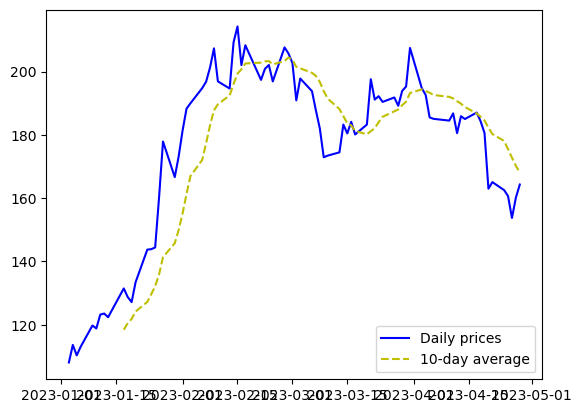

In [111]:
# Plot daily prices and the moving average.

plt.plot(tsla.index, tsla['Close'], 'b-')
plt.plot(moving_avg.index, moving_avg, 'y--')
plt.legend(['Daily prices', '10-day average'])

[*********************100%***********************]  1 of 1 completed


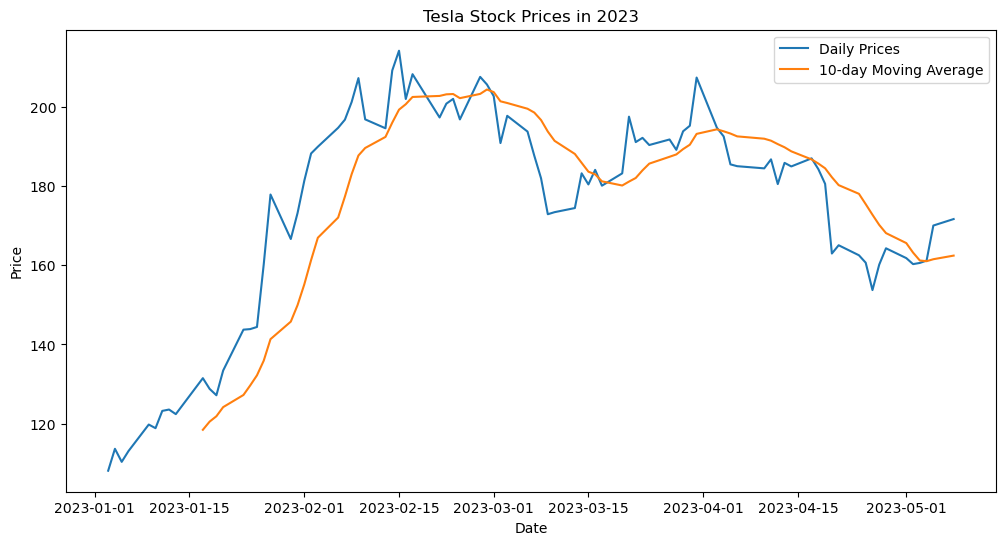

In [112]:
# Solution by ChatGPT
import yfinance as yf
import matplotlib.pyplot as plt

# Specify the stock symbol and year
symbol = 'TSLA'
year = 2023

# Retrieve the daily stock data for Tesla in 2023
data = yf.download(symbol, start=f"{year}-01-01", end=f"{year}-12-31")

# Calculate the 10-day moving average
data['MA10'] = data['Close'].rolling(window=10).mean()

# Plotting the daily prices and the 10-day moving average
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Daily Prices')
plt.plot(data.index, data['MA10'], label='10-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Prices in 2023')
plt.legend()
plt.show()